Name: Raghav Sharma<br>
Roll no: 25201313

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
X, y = make_blobs(n_samples=200, centers=2, cluster_std=1.0, random_state=42)
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

In [3]:
clf = SVC(kernel='linear', C=1.0)
clf.fit(Xs, y)

SVC(kernel='linear')

In [4]:
xx, yy = np.meshgrid(np.linspace(Xs[:,0].min()-1, Xs[:,0].max()+1, 500),
                     np.linspace(Xs[:,1].min()-1, Xs[:,1].max()+1, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

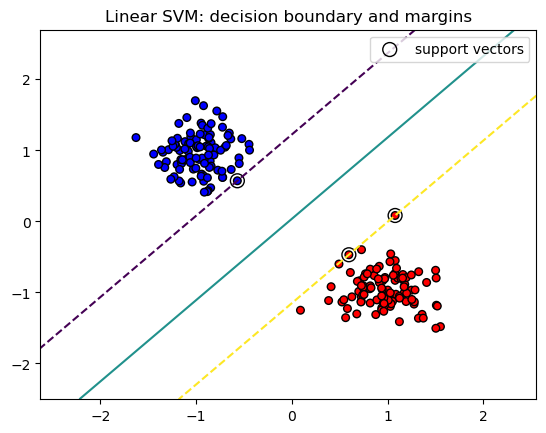

In [5]:
plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--','-','--'])
plt.scatter(Xs[:,0], Xs[:,1], c=y, s=30, cmap='bwr', edgecolors='k')
plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=100,
            linewidths=1, facecolors='none', edgecolors='k', label='support vectors')
plt.title('Linear SVM: decision boundary and margins')
plt.legend()
plt.show()

In [6]:
y_pred = clf.predict(Xs)
print(classification_report(y, y_pred))
print("Support vectors per class:", clf.n_support_)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Support vectors per class: [1 2]
